In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data  = pd.read_csv(r'C:\Users\Aarushi pc\Desktop\python\datasets\graduate admissions\Admission_Predict_Ver1.1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

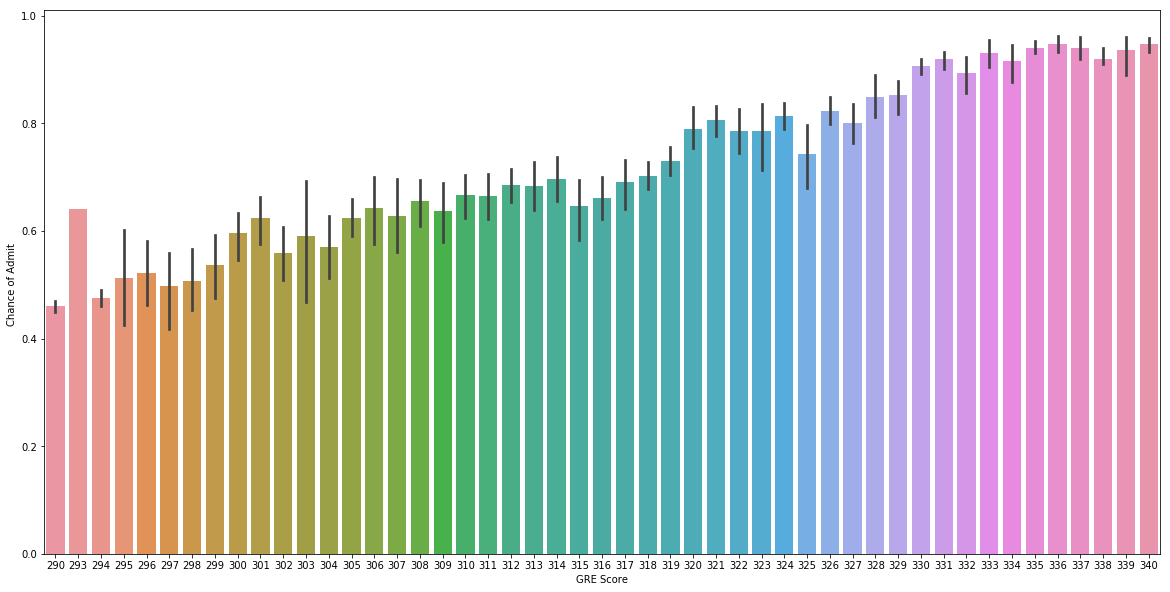

In [6]:
fig = plt.figure(figsize= (20,10))
sns.barplot(x='GRE Score',y='Chance of Admit ',data=data)

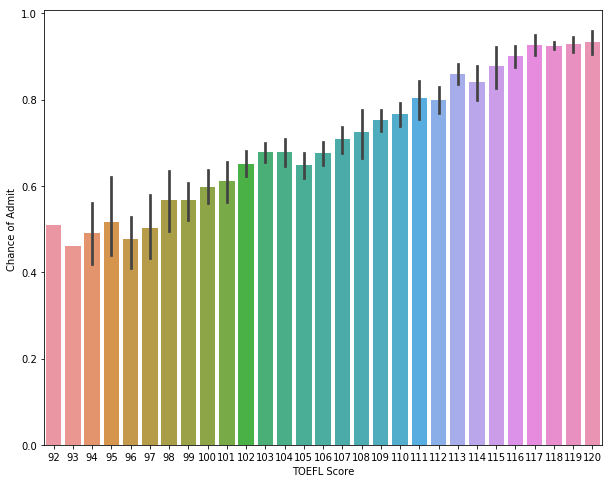

In [7]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit ',data=data)

In [21]:
x = data.drop(['Serial No.','Chance of Admit '],axis=1)
y = data['Chance of Admit ']

In [23]:
from sklearn import preprocessing
#Normalisation works slightly better for Regression.
x=preprocessing.normalize(x)

In [40]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [42]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_squared_error

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred))) 

Mean Absolute Error: 0.05063030303030304
Mean Squared Error: 0.0048255393939393935
Root Mean Squared Error: 0.06946610248127782


In [44]:
regressors=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
reg_pred=[]
print('Results...\n')
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name,rms)

Results...

Linear Regression : 0.08009115695796859
Decision Tree Regression : 0.08957813586050127
Random Forest Regression : 0.07580149514796305
Gradient Boosting Regression : 0.07198855910255383
Ada Boosting Regression : 0.0741475311288276
Extra Tree Regression : 0.06512738101271813
K-Neighbors Regression : 0.08938578288418232
Support Vector Regression : 0.1428453777770504
